In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

In [2]:

csv_path = "poi_dataset.csv"
df= pd.read_csv(csv_path)

train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=0)
train.to_csv('./data/poi_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/poi_test.csv', sep=';', decimal='.', index=False)

In [4]:
csv_path = "./data/poi_train.csv"
data= pd.read_csv(csv_path, sep=";",decimal='.')
print(data.columns)

Index(['id', 'name', 'shortDescription', 'categories', 'tier', 'locationLon',
       'locationLat', 'tags', 'xps', 'Visits', 'Likes', 'Dislikes',
       'Bookmarks', 'main_image_path'],
      dtype='object')


In [4]:
data.isna().sum()

id                  0
name                0
shortDescription    0
categories          0
tier                0
locationLon         0
locationLat         0
tags                0
xps                 0
Visits              0
Likes               0
Dislikes            0
Bookmarks           0
main_image_path     0
dtype: int64

In [5]:
data.describe()

,tier,locationLon,locationLat,xps,Visits,Likes,Dislikes,Bookmarks
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,1.549801,-1.452360,39.858279,749.282869,10011.836653,3491.242231,2572.129084,935.966534
std,0.638128,22.263797,10.084507,229.023227,5.396371,4606.720158,2254.472727,1399.730994
min,1.000000,-121.951049,-62.940930,0.000000,10001.000000,100.000000,52.000000,50.000000
25%,1.000000,-3.725670,40.411991,600.000000,10008.000000,461.000000,977.500000,115.000000
50%,1.000000,-3.698543,40.421767,700.000000,10011.000000,1267.000000,2727.000000,302.000000
75%,2.000000,-3.671105,40.476477,1000.000000,10015.000000,6109.000000,3402.000000,1173.500000
max,4.000000,135.803626,65.706572,1000.000000,10038.000000,26084.000000,10999.000000,8157.000000


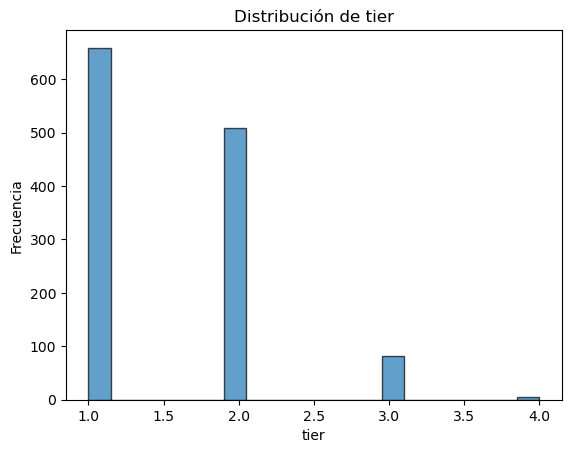

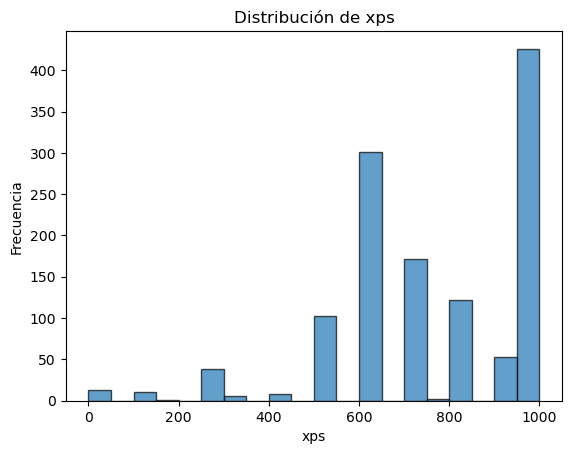

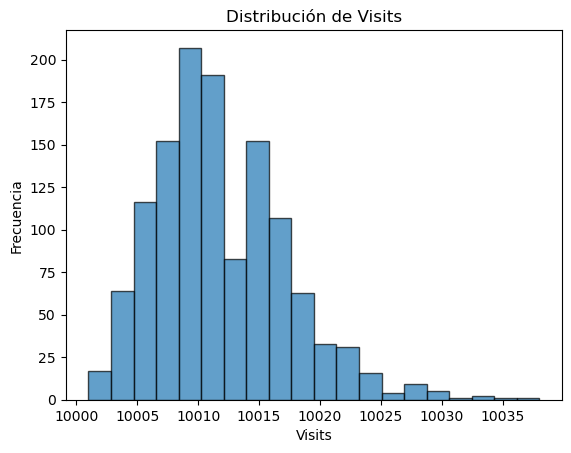

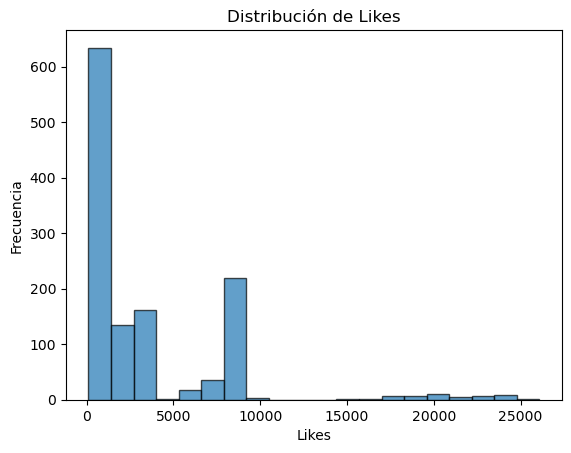

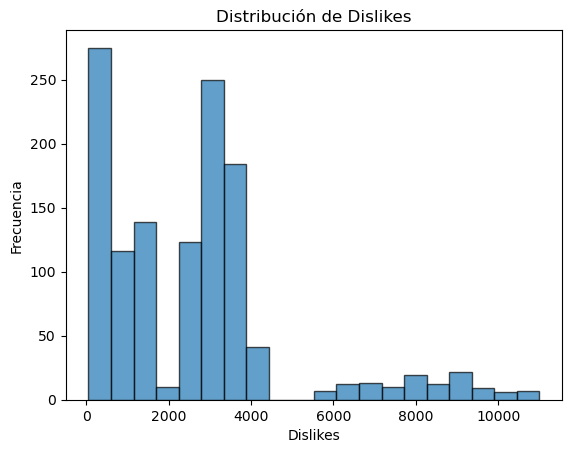

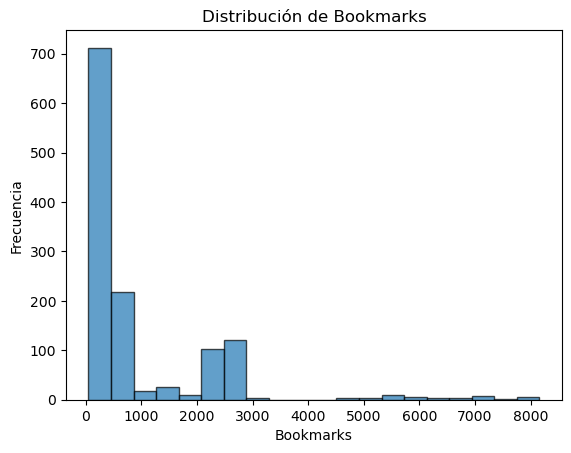

In [6]:
columns_to_plot = ['tier','xps', 'Visits', 'Likes','Dislikes','Bookmarks']  

for column in columns_to_plot:
    plt.figure()  
    plt.hist(data[column], bins=20, edgecolor='k', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {column}')
    plt.show()

In [7]:
datos=data.drop(['main_image_path','name', 'tags', 'main_image_path', 'id','categories', 'shortDescription','locationLon','locationLat'], axis=1)
correlation_matrix=datos.corr()

In [8]:
correlation_matrix

,tier,xps,Visits,Likes,Dislikes,Bookmarks
tier,1.000000,-0.766396,-0.011415,-0.141446,0.185691,-0.127473
xps,-0.766396,1.000000,0.006003,0.137511,-0.167823,0.109365
Visits,-0.011415,0.006003,1.000000,-0.031830,0.009871,-0.035666
Likes,-0.141446,0.137511,-0.031830,1.000000,-0.539187,0.971648
Dislikes,0.185691,-0.167823,0.009871,-0.539187,1.000000,-0.519067
Bookmarks,-0.127473,0.109365,-0.035666,0.971648,-0.519067,1.000000


El dataset está limpio y preparado para el análisis. En columnas como **Likes**, **Dislikes** y **Bookmarks** principalmente, se observa una distribución sesgada con una cola larga, lo que indica que la mayoría de los valores se concentran en rangos bajos, mientras que unos pocos alcanzan valores muy altos. Esto puede influir en los resultados del modelo y será importante tenerlo en cuenta durante el análisis, aplicando transformaciones como el escalado logarítmico para reducir el impacto de los valores extremos y estabilizar la distribución.


Además, se decidió crear la columna **geo_cluster**, ya que esta puede facilitar el análisis de la interacción en diferentes grupos geográficos. Esto permitirá identificar si los POIs en ciertos clusters presentan mayor interacción y asociar patrones de engagement con ubicaciones específicas.

In [8]:
coordinates = data[['locationLon','locationLat']].values

d:\ejecutables\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
d:\ejecutables\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
d:\ejecutables\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
d:\ejecutables\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

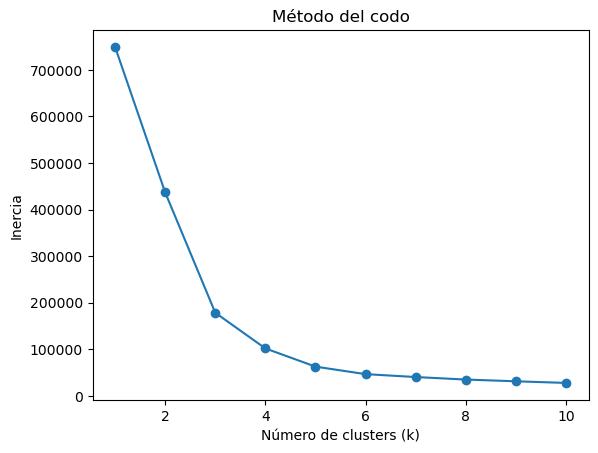

In [9]:
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(coordinates)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()


In [10]:
with open('./modelos/kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)